<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/50_C_Datos_A_E_Datos_ACP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **216. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**
+ Seleccionamos la base de datos a trabajar: Tengo 9 columnas y 17000 registros
+ El Algoritmo PCA nos va a mostrar la dirección donde hay la mayor varianza. Es decir, en grafico de od caracerística la lina de tendencia sera nuestra "Primera componete principal"
+ Despues busca un eje ortogonal al primero y toma estos dos ejes como los nuevos parametros.


In [ ]:
#**a. Eligimos nuestra base de datos**
datos_train=pd.read_csv("/content/Datos_de_practica.csv",delimiter=';')
datos_train

,Ciudades,Ca DE ESTOMAGO,DIABETES,IRA,A. DE TRANSITO,HOMICIDIOS,SUICIDIOS
0,Medellín,34,65,77,101,181,23
1,Cali,49,49,50,99,169,14
2,Barranquilla,47,47,76,85,175,32
3,Cartagena,52,66,82,103,206,18
4,Soacha,53,62,86,104,190,28
5,Cúcuta,49,70,97,92,187,26
6,Soledad,40,57,97,88,200,29
7,Bucaramanga,65,78,82,111,216,24
8,Bello,50,77,70,96,191,23
9,Valledupar,50,67,98,84,218,28


# **b. Pasamos los datos a Numpy**

In [ ]:
# **b. Pasamos los datos a Numpy**
datosNP = datos_train.to_numpy()
print(datosNP)

[['Medellín' 34 65 77 101 181 23]
 ['Cali' 49 49 50 99 169 14]
 ['Barranquilla' 47 47 76 85 175 32]
 ['Cartagena' 52 66 82 103 206 18]
 ['Soacha' 53 62 86 104 190 28]
 ['Cúcuta' 49 70 97 92 187 26]
 ['Soledad' 40 57 97 88 200 29]
 ['Bucaramanga' 65 78 82 111 216 24]
 ['Bello' 50 77 70 96 191 23]
 ['Valledupar' 50 67 98 84 218 28]
 ['Villavicencio' 50 76 77 94 238 41]
 ['Santa Marta' 62 82 60 98 215 37]
 ['Ibagué' 37 68 73 67 183 27]
 ['Montería' 45 67 51 78 159 20]
 ['Pereira' 59 78 76 84 198 27]
 ['Manizales' 55 78 76 84 198 27]
 ['Pasto' 60 78 75 86 213 31]
 ['Neiva' 48 70 119 95 160 27]
 ['Palmira' 55 98 120 95 209 29]
 ['Popayán' 49 85 91 92 200 24]
 ['Buenaventura' 56 71 58 85 202 26]
 ['Armenia' 57 69 59 107 231 25]
 ['Floridablanca' 50 72 72 94 216 24]
 ['Sincelejo' 52 68 71 118 251 33]
 ['Itagüí' 66 88 74 89 211 34]
 ['Tumaco' 58 79 66 79 197 26]
 ['Envigado' 59 71 85 103 189 26]
 ['Dosquebradas' 58 73 109 84 202 36]
 ['Tuluá' 51 67 87 83 193 36]
 ['Barrancabermeja' 57 102 103 

# **c. Separamos la Data en dos Matrices**

In [ ]:
# **c. Separamos la Data en dos Matrices**
ciudad = datosNP[:,0] # Guardamos ciudad
X = datosNP[:,1:7]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # Escalamos la Matriz todo a media cero y varianza 1
print(X)

[[-3.01945394 -1.13211103  0.0252844   1.16984332  0.04883424 -0.50581546]
 [-0.92584181 -2.43369976 -1.68141279  1.05177671 -0.35071861 -2.04898127]
 [-1.20499009 -2.59639835 -0.0379266   0.22531045 -0.15094219  1.03735035]
 [-0.50711938 -1.05076173  0.34133944  1.28790993  0.88123601 -1.3631298 ]
 [-0.36754524 -1.37615892  0.59418347  1.34694324  0.34849887  0.35149888]
 [-0.92584181 -0.72536455  1.28950455  0.63854358  0.24861066  0.00857314]
 [-2.18200909 -1.78290539  1.28950455  0.40241036  0.68145958  0.52296175]
 [ 1.30734446 -0.07457019  0.34133944  1.76017637  1.21419672 -0.33435259]
 [-0.78626767 -0.15591948 -0.41719265  0.8746768   0.38179495 -0.50581546]
 [-0.78626767 -0.96941244  1.35271556  0.16627714  1.28078886  0.35149888]
 [-0.78626767 -0.23726878  0.0252844   0.75661019  1.94671027  2.58051615]
 [ 0.88862204  0.25082699 -1.04930272  0.99274341  1.18090064  1.89466469]
 [-2.60073151 -0.88806314 -0.22755963 -0.83728904  0.11542638  0.18003601]
 [-1.48413838 -0.96941244

# **d. Todas las columnas suman cero**

In [ ]:
# **d. Todas las columnas suman cero**
print(sum(X)) # Todas las columnas suman cero

[ 4.21884749e-15 -2.96984659e-14  1.92623695e-14 -9.32587341e-15
  3.33066907e-15  1.19904087e-14]


# **e. Graficamos la información para dos variables**
+ Se evidencia que las dos variables se encuentran muy correlacionadas

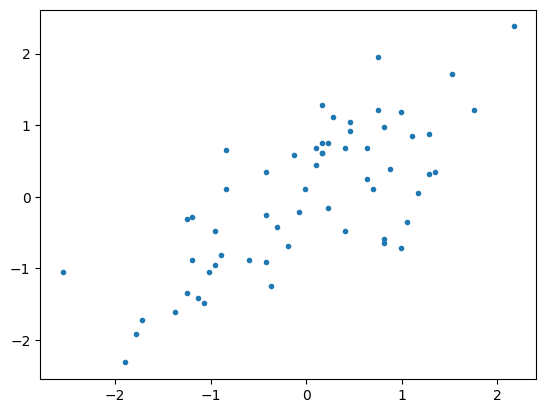

In [ ]:
# **e. Graficamos la información para dos variables**
x = X[:,3] # Graficamos la variable X_4 y la X_5 A. X5 = Muertes DE TRANSITO, X6 =	HOMICIDIOS
y = X[:,4]
plt.plot(x,y,'.')

# **f. Graficamos la información para dos variables con los nombres**

+ Las dos variables estan muy correlacionadas y esto no nos interesa cuando hagamos PCA para dos variables

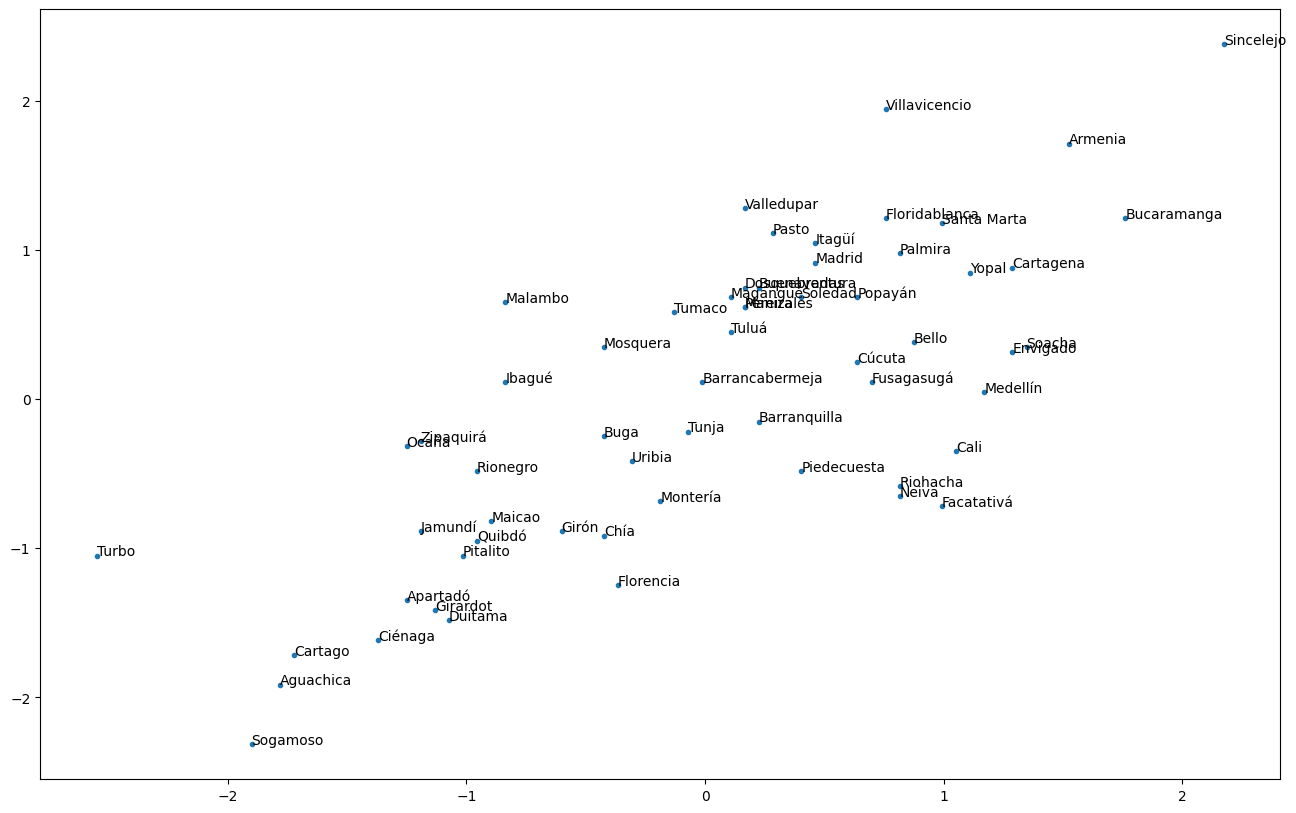

In [ ]:
# **f. Graficamos la información para dos variables con los nombres**
plt.figure(figsize=(16,10)) # Tamaño del grafico
x = X[:,3] # Graficamos la variable X_4 y la X_5 A. X5 = Muertes DE TRANSITO, X6 =	HOMICIDIOS
y = X[:,4]
plt.plot(x,y,'.')
for label, x, y in zip(ciudad, x,y):
  plt.annotate(label, xy = (x,y))

plt.show()


In [ ]:
datos_train.columns

Index(['Ciudades', 'Ca DE ESTOMAGO', 'DIABETES', 'IRA', 'A. DE TRANSITO',
       'HOMICIDIOS', 'SUICIDIOS'],
      dtype='object')

# **g. Graficamos dos variables que aportan mas información tiene mayor dispersion**

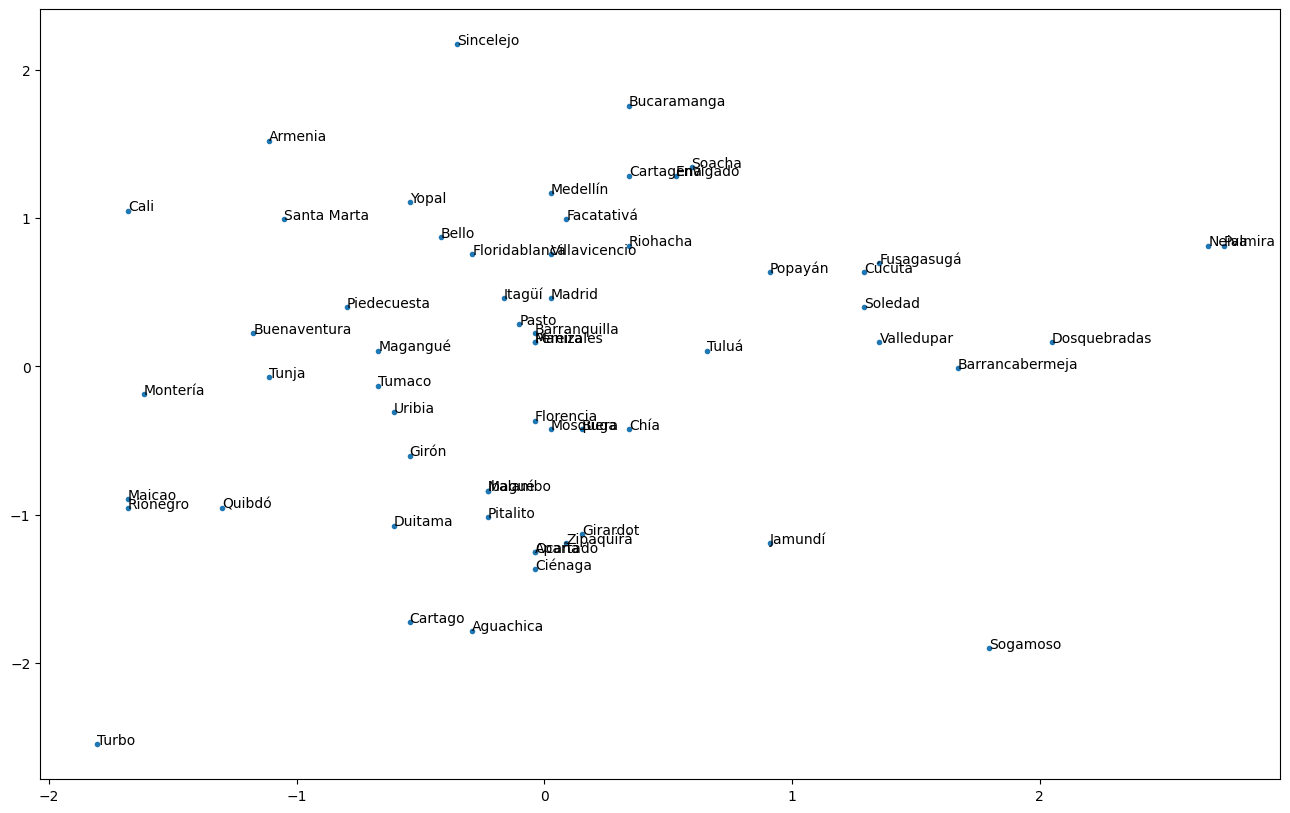

In [ ]:
# **g. Graficamos la información para dos variables con los nombres**
plt.figure(figsize=(16,10)) # Tamaño del grafico
x = X[:,2] # Graficamos la variable X_3 y la X_4 A.
y = X[:,3]
plt.plot(x,y,'.')
for label, x, y in zip(ciudad, x,y):
  plt.annotate(label, xy = (x,y))

plt.show()

# **h. La dimensión de la data**

In [ ]:
# **h. La dimensión de la data**
datos_train.shape


(60, 7)

# **i. Veamos si la data contiene datos perdidos**

In [ ]:
# **i. Veamos si contiene datos perdidos**
datos_train.isnull().sum()

Ciudades          0
Ca DE ESTOMAGO    0
DIABETES          0
IRA               0
A. DE TRANSITO    0
HOMICIDIOS        0
SUICIDIOS         0
dtype: int64

# **j. Veamos si contiene datos perdidos**
+ Como en la parte _c_ no se observan todas las variables, sumamos todos los resultado y no tenemos un problema de imputacion de datos

In [ ]:
# **j. Veamos si contiene datos perdidos**
datos_train.isnull().sum().sum()

0

# **k. PCA es solo con variables cuantitativas**
+ Verifiquemos que solo trabajaremos con variables cuantitativas

In [ ]:
# **k. PCA es solo con variables cuantitativas**
datos_train.columns

Index(['Ciudades', 'Ca DE ESTOMAGO', 'DIABETES', 'IRA', 'A. DE TRANSITO',
       'HOMICIDIOS', 'SUICIDIOS'],
      dtype='object')

In [ ]:
datos_train.dtypes

Ciudades          object
Ca DE ESTOMAGO     int64
DIABETES           int64
IRA                int64
A. DE TRANSITO     int64
HOMICIDIOS         int64
SUICIDIOS          int64
dtype: object

# **l. Preguntemonos si hay correlación entre las variables**

In [ ]:
# **l. Preguntemonos si hay correlación entre las variables**
df_corr = datos_train.corr() # Metodo ()
df_corr

,Ca DE ESTOMAGO,DIABETES,IRA,A. DE TRANSITO,HOMICIDIOS,SUICIDIOS
Ca DE ESTOMAGO,1.000000,0.453823,-0.146132,-0.153251,-0.147029,0.112439
DIABETES,0.453823,1.000000,0.173977,-0.381711,-0.321392,-0.031674
IRA,-0.146132,0.173977,1.000000,0.190770,0.100456,0.202641
A. DE TRANSITO,-0.153251,-0.381711,0.190770,1.000000,0.744991,0.361111
HOMICIDIOS,-0.147029,-0.321392,0.100456,0.744991,1.000000,0.548030
SUICIDIOS,0.112439,-0.031674,0.202641,0.361111,0.548030,1.000000


# **m. Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-39-697e30fd26e2>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


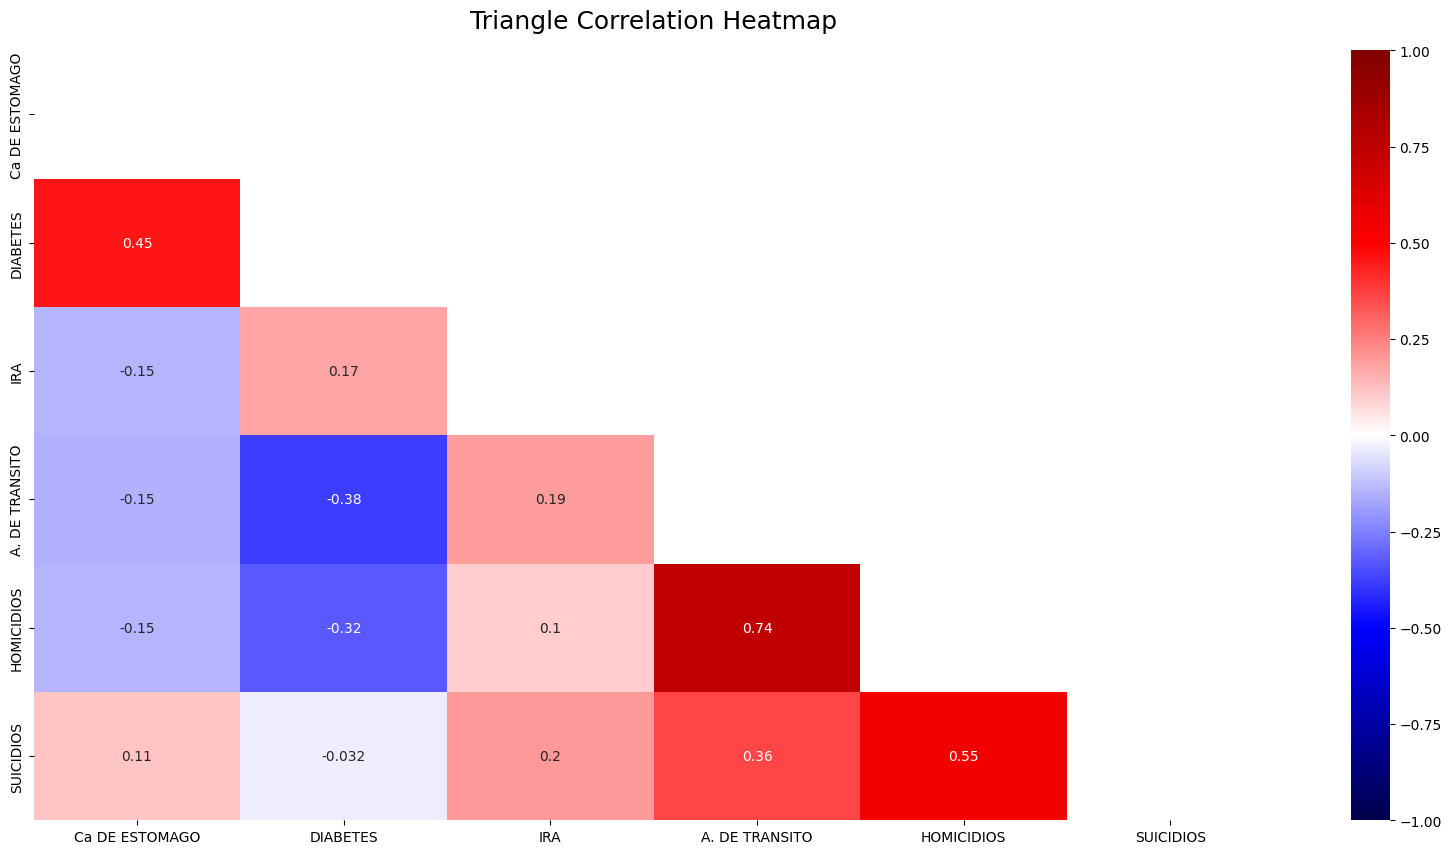

In [ ]:
# **m. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
heatmap = sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

# **n. Matriz de Covarianza**

In [ ]:
# **n. Matriz de Covarianza**
datos_train.cov()

,Ca DE ESTOMAGO,DIABETES,IRA,A. DE TRANSITO,HOMICIDIOS,SUICIDIOS
Ca DE ESTOMAGO,52.202260,40.646893,-16.844068,-18.914689,-32.174011,4.777966
DIABETES,40.646893,153.670904,34.406780,-80.831921,-120.666667,-2.309322
IRA,-16.844068,34.406780,254.515254,51.989831,48.538983,19.013559
A. DE TRANSITO,-18.914689,-80.831921,51.989831,291.813277,385.442938,36.280508
HOMICIDIOS,-32.174011,-120.666667,48.538983,385.442938,917.303955,97.620339
SUICIDIOS,4.777966,-2.309322,19.013559,36.280508,97.620339,34.590678


# **o. Valores propios y vectores propios**

In [ ]:
from numpy.linalg import eig
valores, vectores = eig(datos_train.cov())
print('Imprima los valores propios',valores)
print('Imprima los vectores vectores propios', vectores)


Imprima los valores propios [1137.99275841  267.6282306   152.40032129   91.40715449   19.46915402
   35.19870887]
Imprima los vectores vectores propios [[-0.03967134  0.01271901  0.31302996 -0.32647206  0.37778013  0.80683011]
 [-0.14282004 -0.29836232  0.75865019 -0.37636605 -0.09105663 -0.40631211]
 [ 0.07088382 -0.94560772 -0.17710186  0.20841067  0.10527755  0.12213963]
 [ 0.42592301 -0.08786399 -0.40999837 -0.79105888 -0.08489079 -0.09894563]
 [ 0.88477506  0.07635024  0.33527173  0.28437594  0.13013529 -0.03364118]
 [ 0.09363112 -0.05563051  0.12079429  0.04105788 -0.90208972  0.39761236]]


# **217. Parte II: Ejemplo 1.  Aplicando el Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Usamos la libreria donde esta la componente principal**

In [ ]:
# **a. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA() # n_components = 2

# Obtenemos los componentes principales

X_std_pca = pca.fit(X) # hace lo solicitado a la base de datos

# veamos lo que hizo
X_std_pca

PCA()

# **b. Cuanta varianza corresponde a cada componente**

In [ ]:
# **b. Cuanta varianza corresponde a cada componente**
X_std_pca.explained_variance_ratio_.shape # nos muestra la misma cantidad de variables

(6,)

In [ ]:
# **b. Cuanta varianza corresponde a cada componente**
print(X_std_pca.explained_variance_ratio_) # nos muestra la misma cantidad de variables

[0.39586348 0.23676525 0.17576367 0.09221139 0.06701652 0.03237969]


# **c. Gráfico de la varianza corresponde a cada componente posible de elegir**

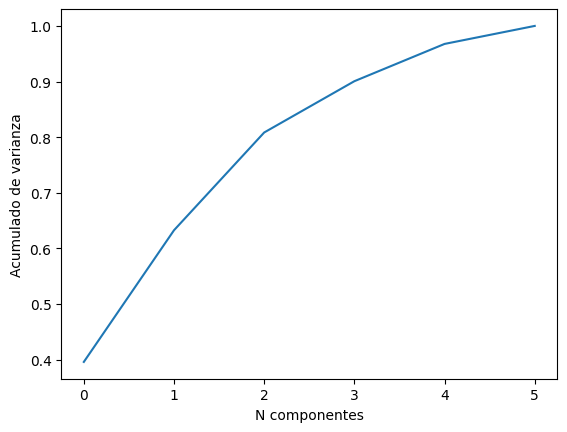

In [ ]:
# **c. Cuanta varianza corresponde a cada componente**
var_exp = np.cumsum(X_std_pca.explained_variance_ratio_)# Esta es la varianza explicada
plt.plot(var_exp)
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

# **d. Queremos saber cuantas componentes necesitamos**

In [ ]:
# **f. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 70%', np.where((var_exp>0.6)&(var_exp<0.7)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 80%', np.where((var_exp>0.6)&(var_exp<0.8)))
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 95%', np.where((var_exp>0.6)&(var_exp<0.90)))


Cuantas componentes me explican mas del 60% de la varianza pero menos del 70% (array([1]),)
Cuantas componentes me explican mas del 60% de la varianza pero menos del 80% (array([1]),)
Cuantas componentes me explican mas del 60% de la varianza pero menos del 95% (array([1, 2]),)


# **e. n_components elegidos**

In [ ]:
# **e. n_components elegidos**
n_components = 2

# **f. Usamos la libreria donde esta la componente principal**

In [ ]:
# **f. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA(n_components = 2) # n_components = 2

# Obtenemos los componentes principales

X_std_pca2 = pca.fit_transform(X) # hace lo solicitado a la base de datos

# veamos lo que hizo nos da dos nuevas columnas
X_std_pca2

array([[ 1.57289901e+00,  2.55430293e+00],
       [ 3.95469013e-01,  3.42329309e+00],
       [ 1.62907890e+00,  1.71734036e+00],
       [ 1.23873474e+00,  1.25540536e+00],
       [ 1.75615833e+00,  5.42078516e-01],
       [ 1.17233286e+00,  4.75052145e-01],
       [ 2.14853356e+00,  1.51686803e+00],
       [ 1.34136446e+00, -8.95731805e-01],
       [ 6.80622452e-01,  8.21636265e-01],
       [ 1.70206630e+00,  2.41962398e-01],
       [ 2.81930263e+00, -9.20129604e-01],
       [ 1.52294186e+00, -1.41132909e+00],
       [ 5.33711135e-01,  2.01403616e+00],
       [-4.72713067e-01,  2.49800888e+00],
       [ 4.32666961e-01, -3.86674510e-01],
       [ 5.58708991e-01, -6.61616480e-02],
       [ 1.01313528e+00, -8.39331260e-01],
       [ 1.06867991e+00,  1.42672988e-01],
       [ 1.12692115e+00, -2.11956543e+00],
       [ 7.97018459e-01, -9.22306564e-04],
       [ 5.93825654e-01,  6.01741028e-01],
       [ 1.84797236e+00,  4.91659426e-01],
       [ 1.32564330e+00,  8.32498551e-01],
       [ 3.

# **g. Las dimensiones de nuestra nueva Matriz**

In [ ]:
# **g. Las dimensiones**
X_std_pca2.shape # Tenemos menos variables que las originales

(60, 2)

# **h. Varianza explicada por las componentes elegidas**

In [ ]:
# **h. Varianza explicada por las componentes elegidas**
print('Cuanto explica cada componente elegida',pca.explained_variance_ratio_)
print( 'Cuanto explica la suma de las componentes elegidas', np.sum(pca.explained_variance_ratio_))

Cuanto explica cada componente elegida [0.39586348 0.23676525]
Cuanto explica la suma de las componentes elegidas 0.6326287300780803


# **i. Graficamos la información para dos nuevas variables elegidas de las componentes principales**
+ Se logro una mejor dispersión de los datos
+ La idea es separar en dos variables lo mas separadas posibles.
+ Estas variables en principio no tiene interpretación

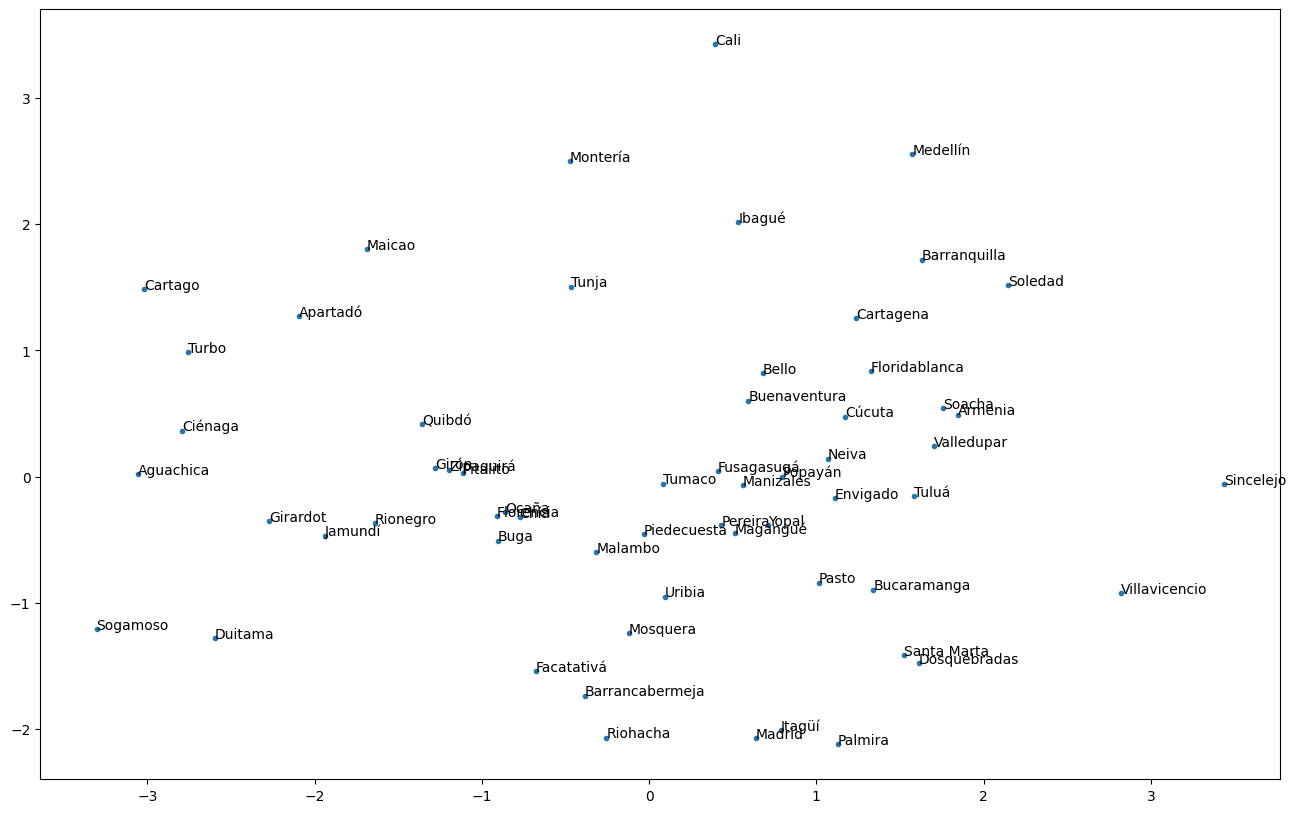

In [ ]:
# **i. Graficamos la información para dos nuevas variables elegidas de las componentes principales**
plt.figure(figsize=(16,10)) # Tamaño del grafico
x = X_std_pca2[:,0] # Graficamos la variable X_3 y la X_4 A.
y = X_std_pca2[:,1]
plt.plot(x,y,'.')
for label, x, y in zip(ciudad, x,y):
  plt.annotate(label, xy = (x,y))

plt.show()

# **j. Cantidad de variables de las originales tiene cada componente**

+ **Variables**
 - $X_1=$'Ca DE ESTOMAGO',
 - $X_2=$'DIABETES',
 - $X_3=$'IRA',
 - $X_4=$'A. DE TRANSITO',
 - $X_5=$  'HOMICIDIOS',
 - $X_6=$'SUICIDIOS'
+ La primera fila es la nueva variable que llamaremos $Z_1$
 - $Z_1= -0.22576179X_1 -0.35409993X_2+ 0.1565386X_3+0.56026583X_4+0.57723742X_5+0.38992267X_6$
+ La segunda fila es la nueva variable que llamaremos $Z_2$
 - $Z_2 =-0.57409069X_1 -0.57471716X_2 -0.31643233X_3 -0.0456074X_4 -0.12931557X_5-0.47030638X_6$

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_# Pesos o coeficientes que nos muestra cuanto de cada variable original tienen nuestras nuevas variables

array([[-0.22576179, -0.35409993,  0.1565386 ,  0.56026583,  0.57723742,
         0.38992267],
       [-0.57409069, -0.57471716, -0.31643233, -0.0456074 , -0.12931557,
        -0.47030638]])

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.shape # Nos muestra que son tres variables combinado las 9

(2, 6)

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.T # Hacemos la transpuesta de estos pesos que son las componentes

array([[-0.22576179, -0.57409069],
       [-0.35409993, -0.57471716],
       [ 0.1565386 , -0.31643233],
       [ 0.56026583, -0.0456074 ],
       [ 0.57723742, -0.12931557],
       [ 0.38992267, -0.47030638]])

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.T.shape # Otra vez chequeamos las dimensones de nuestras matrices

(6, 2)

# **k. Matrices de las componentes principales**

In [ ]:
# **k. Matrices de las componentes principales**
pd.DataFrame(pca.components_.T)
list_namepca = [f'PC{i}' for i in range(1,3)]
df_pca_loading = pd.DataFrame(pca.components_.T, columns = list_namepca)
df_pca_loading

,PC1,PC2
0,-0.225762,-0.574091
1,-0.354100,-0.574717
2,0.156539,-0.316432
3,0.560266,-0.045607
4,0.577237,-0.129316
5,0.389923,-0.470306


# **l. Verificando si se cumple la propiedad de los eigen valores en el PCA**

In [ ]:
print('La suma de los coeficientes PC1 es igual a =',df_pca_loading[['PC1']].apply(lambda x:sum(x**2)))
print('La suma de los coeficientes PC2 es igual a =',df_pca_loading[['PC2']].apply(lambda x:sum(x**2)))


La suma de los coeficientes PC1 es igual a = PC1    1.0
dtype: float64
La suma de los coeficientes PC2 es igual a = PC2    1.0
dtype: float64


# **m. Nuevamente graficamos**

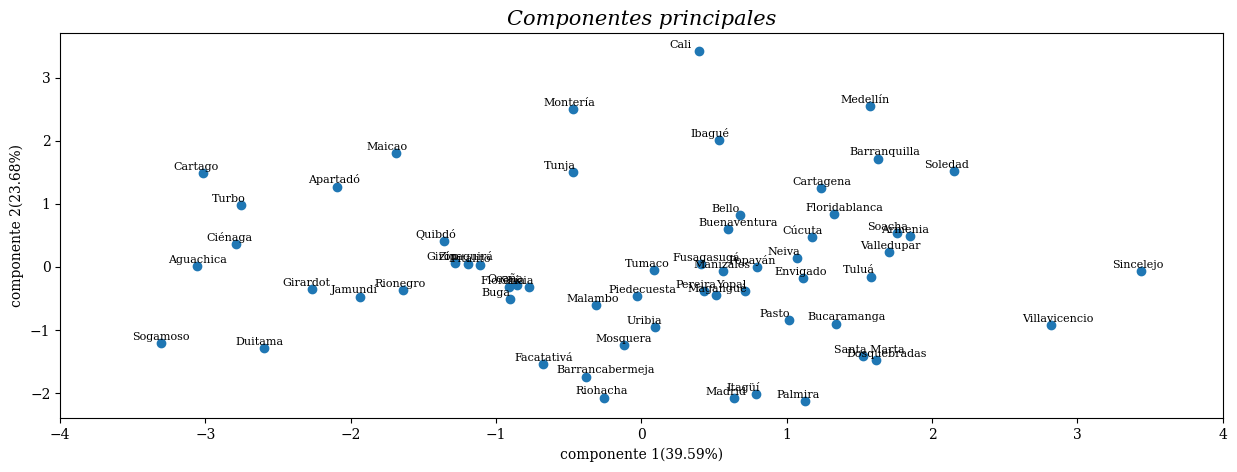

In [ ]:
# **m. Nuevamente graficamos**
from sympy.ntheory.continued_fraction import continued_fraction_periodic
fig = plt.figure(figsize=(15,5)) # figura
plt.rcParams['font.family']='serif' # Estilo

x_label = 'componente 1('+str(round(pca.explained_variance_ratio_[0]*100,2))+'%)'

y_label = 'componente 2('+str(round(pca.explained_variance_ratio_[1]*100,2))+'%)'

nombres = ciudad

ax = fig.add_subplot(1,1,1) # vamos a crear solamente un grafico y lo guardamos en el objeto ax
ax.set_xlabel(x_label, fontsize = 10) # nombre de los ejes
ax.set_ylabel(y_label, fontsize = 10)
ax.set_title('Componentes principales', fontsize = 15, fontstyle = 'italic')
ax.set_xlim(-4,4) # rango de valores del eje x

ax.scatter (x = X_std_pca2[:,0], y = X_std_pca2[:,1]) # s = 20 tamaño de ls puntos

for i, nombre in enumerate(nombres):
  ax.annotate(nombre, (X_std_pca2[i,0]-0.2, X_std_pca2[i,1]+0.05),fontsize = 8 )

plt.show()